## Linear Regression

- The biggest advantage of linear regression models is linearity
- Estimated weights come with confidence intervals.

### for model correcting
- Linearity : x와 y의 선형성
- normality : target outcome follows a nomal dist. if not the estimated confidence intervals of the feature weights are invalid.
- Homoscedasticity(constant variance) : error term is assumed to be constant
- Independence : each instance가 서로 독립
- Fixed features : input featrue를 fixed 라고 생각(random variable이 아니라)
- Absence of multicollinearity

### Interpretation
- 계수만큼 target의 값이 변화
- R-square = SSR/SST = 1 - SSE/SST
- adjusted R-square
$${ R }^{2 } - (1 - { R }^{2 } )\frac { p }{n-p-1}$$

#### feature importance
- estimated weight scaled with its standard error (t statistic)
$$\frac { \hat { \beta }  }{ SE(\hat { \beta }  )} $$
- importance increases as weight up, less variance of weight(more certain about the correct value)

### Visual interpretation

#### Weight plot

In [138]:
day = pd.read_csv('data/day.csv')

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 

# sns.set_style(style='white')
sns.set_context(context ='paper')

In [135]:
def weight_plot(X,y) : 
    
    X = sm.add_constant(X)
    scaler = StandardScaler()
    scaler.fit(X)
    scaled_X = scaler.transform(X)
    final_X = pd.DataFrame(scaled_X, columns = X.columns)
    model = sm.OLS(y, final_X)
    res = model.fit()
    low = res.conf_int()[0]
    up = res.conf_int()[1]
    abs(low - up)/2
    
    plt.figure(figsize = (14,7))
    plt.errorbar(final_X.columns, y = res.params, fmt = 'o',color='black',
                        ecolor='lightgray', elinewidth=3, capsize=0, yerr = abs(low - up)/2)
    plt.xticks(rotation = 45)
    plt.show()

C:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


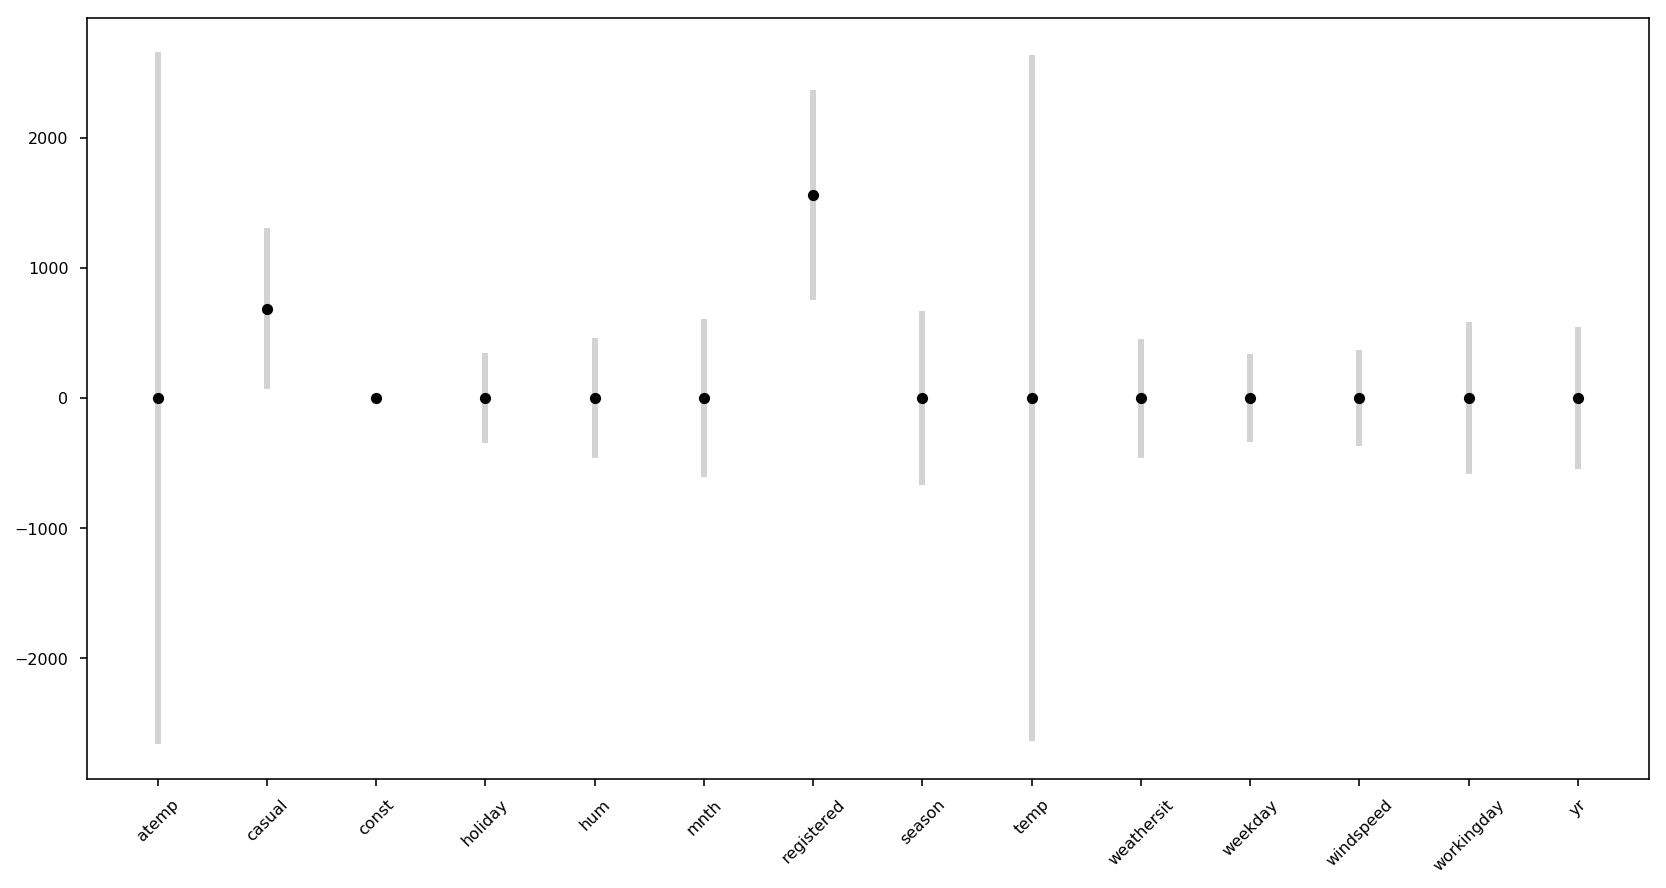

In [136]:
weight_plot(X,y)

#### Effect plot
- 각 feature별 weight * instance 의 결과를 boxplot으로 나타내는 방법이다.
- 이를 통해 스케일이 다르더라도 실제로 해당 feature가 target에 어떤 변화를 만드는지에 대해 한눈에 파악가능하다.
- 또한, 특정한 instance를 plot한다면 그 instance의 전반적인 위치를 한눈에 파악할 수 있다.  

## Logistic Regression

- log 안에 있는 확률을 'odds'(probability of event divided by probability of no event)라고 한다.

$$\log { \frac { P(y = 1) }{ P(y=0) } } ={ \beta }_{ 0 } + { \beta }_{ 1 }{ x }_{ 1 }+ ...+   { \beta }_{ p }{ x }_{ p }$$

- 장단점으로는 regression의 특징을 갖고 있으며 classification의 확률을 제공한다는 매력이 있다.

## GLM, GAM and more
- linear regression model의 정확성을 위한 여러 가지 가정들은 실제로 지켜지기 어렵다. 이를 위해 우리는 다양한 기법으로 이 가정에 상황을 맞추려 노력한다.
- 예를 들어, 변수간의 interaction, target의 not gaussian dist, 비선형성 등등
- 이를 위해 조금 더 extended 된 모델도 있으며 이제 이에 대해 살펴볼 예정이다.

## GLM(Generalized Linear Model)
- target이 Gaussian dist를 따르지 않을 경우 사용한다. 
- 분포가 skewd되어있거나 target이 포아송, 베르누이 분포 등을 따르는 것이 적합하다고 판단될 때 사용한다.

의미
- logistic regression이 outcome에 대해 베르누이 분포를 가정하는 것이 하나의 예라고 할 수 있다.
- connect the expected mean of tnon-gaussian distribution and the weighted sum through a nonlinear function
$$g({ E }_{ y }(y|x)) = { \beta }_{ 0 } + { \beta }_{ 1 }{ x }_{ 1 }+ ...+   { \beta }_{ p }{ x }_{ p }$$

GLM은 세 파트로 이루어져있다.

1.g는 link function

2.the weighted sum

3.probability distribution from the exponential family the defines Ey


#### Logistic regression을 통한 예시


- GML은 주로 MLE를 통해 주로 parameter를 추정한다.
- regression은 yi가 아니라 yi의 평균값을 예측하는 것이 목적이므로 $$E(y_{i}) = p$$ 에 대해서 모델링하는 것이다.
- likleihood function만 구하면 문제해결

#### < parameter estimation의 과정 >

1.target y는 binomial(1,p)를 따른다고 가정한다.

2.y의 pdf는 다음과 같다.
$$P(y_{i}|p) = p^{y_{i}}(1-p)^{y_{i}}$$

3.n개의 관측치들의 pdf는 다음과 같다.
\begin{align}
P(\mathbf y|p)
& = P(y_{1}, y_{2}, ..., y_{N}|p) \\
& = P(y_{1}|p) P(y_{2}|p) ... P(y_{N}|p) \\
& = \Pi_{i = 1}^{N}P(y_{i}|p) \\
& = \Pi_{i = 1}^{N}p^{y_{i}}(1-p)^{1-y_{i}} \\
& = \Pi_{i = 1}^{N} (\frac{p}{1-p})^{1-y_{i}} (1-p)
\end{align}

4.logit함수를 link function으로 이용하여 아래와 같은 식으로 모델링한다.
\begin{align}
g(p) 
& = ln( \frac{p}{1-p} ) \\
& = X\beta
\end{align}

5.위의 식을 변형하여 pdf에 대입하면 likelihood function을 얻을 수 있다.
$$L(\beta|\mathbf y, X) = \Pi_{i=1}^{N} exp(X_{i}\beta)^{y_{i}} \frac{1}{1+ exp(X_{i}\beta)}$$

6.위 식을 최대화하는 parm을 찾으면 된다.

#### interpretation
계수를 있는 그대로 해석하면 않되고 사용한 link function에 따라 해석을 해야한다.

In [2]:
## statsmodels에 있다
## https://www.statsmodels.org/stable/glm.html

import statsmodels.api as sm

data = sm.datasets.scotland.load()
data.exog = sm.add_constant(data.exog)

# Instantiate a gamma family model with the default link function.
gamma_model = sm.GLM(data.endog, data.exog, family=sm.families.Gamma())

gamma_results = gamma_model.fit()

print(gamma_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                   Gamma   Df Model:                            7
Link Function:          inverse_power   Scale:                0.00358428317349
Method:                          IRLS   Log-Likelihood:                -83.017
Date:                Tue, 19 Mar 2019   Deviance:                     0.087389
Time:                        23:46:49   Pearson chi2:                   0.0860
No. Iterations:                     4                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0178      0.011     -1.548      0.122      -0.040       0.005
x1          4.962e-05   1.62e-05      3.060      0.0

C:\anaconda\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:244: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  DomainWarning)


Summary of advantages of GLMs over traditional (OLS) regression
(출처 : https://newonlinecourses.science.psu.edu/stat504/node/216/)
- We do not need to transform the response Y to have a normal distribution
- The choice of link is separate from the choice of random component thus we have more flexibility in modeling
- If the link produces additive effects, then we do not need constant variance.
- The models are fitted via Maximum Likelihood estimation; thus optimal properties of the estimators.
- All the inference tools and model checking that we will discuss for log-linear and logistic regression models apply for other GLMs too; e.g., Wald and Likelihood ratio tests, Deviance, Residuals, Confidence intervals, Overdispersion.
- There is often one procedure in a software package to capture all the models listed above, e.g. PROC GENMOD in SAS or glm() in R, etc... with options to vary the three components.

## Adding interaction manually
- features interact 하는 경우
- additive model이 파악 못 하는 경우도 있다.
- 이런 경우 interaction feature를 추가해주면 효과적이다.
- 예를 들어, 자전거 수요를 예측한다고 하자. 변수로는 workYN, temp 가 있다. workY인 경우에는 일을 위해 날씨에 상관없이 자전거 수요가 있다. 하지만 workN의 경우 날씨가 좋아야 자전거를 타는 경향이 있다. interaction이 있는 것이다.
- 위와 같은 경우에는 어떻게 해야 할까?
- workYNtmep라는 새로운 변수를 만들어 준다. 일을 하는 경우는 temp값으로 일을 안하는 경우에는 0을 넣어준다.
- 하지만 주의해야할 점이 있다. 해석에 있어서 regression model의 경우, 다른 변수가 fixed되어 있고 특정 변수가 변할때 그 계수만큼 target이 변한다고 해석한다. 하지만 interaction의 경우, (temp의 계수에 대해 해석할 때)일을 할 때는 temp의 계수+ workYNtmep의 계수 만큼 target의 수가 변하고 일을 안 하는 경우는 temp의 계수 만큼만 target이 변한다고 해석해야 한다.

## GAM(Generalized Additive Model) or transformation of features
- feature와 y의 관계가 not linear 하는 경우 사용

- GAM의 식은 아래와 같다.
$$y_i=\beta_0+f_1(x_{i1})+..+f_p(x_{ip})+\epsilon_i$$

- GAM에서 중요한 점은 how to learn nonlinear function
- 정답은 'splines' 'spline functions' 이다.
- 각 변수를 smooth하게 만들고 이를 additive하여서 예측

#### 장단점
- 비선형적합인 만큼 예측력이 높다.
- 가법적인 모델이라 다른 변수들이 고정되어 있을떄의 한 변수의 영향을 알 수도 있다.
- inference에도 좋다.
- X에 대한 함수의 smooth정도가 어느 정도인지를 자유도를 통해 간단하게 알 수 있다.
- 상호작용을 잡아낼 수 없다.
- 복잡해지면 interpretation이 떨어진다.
- tree-based ensembles 들이 정확도가 더 좋다.